<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP3/KNN-3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 - Clasificador KNN

### Ejercicio 3.1: (Recordar el ej. 2.3). Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia). 

###Tip: reutilizar el código de la NB que vimos para outliers. 

###Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y también cambiando centroide y covariancia de las clases.

## 1. Librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

## 2. Generación de los datasets

In [2]:
def gen_dataset(media_a, ds_a, media_b, ds_b, features_number, n):
  # Semilla aletoria
  np.random.seed(0)

  a_df = pd.DataFrame(np.random.normal(loc = media_a, scale = ds_a, size=(n, features_number)),
                          columns=['X','Y'])
  a_df['Etiqueta'] = 'A'

  b_df = pd.DataFrame(np.random.normal(loc = media_b, scale = ds_b, size=(n, features_number)),
                          columns=['X','Y'])
  b_df['Etiqueta'] = 'B'

  return a_df, b_df

def merge_dataset(a_df, b_df):
  a_b_df = pd.DataFrame(np.concatenate([a_df['X'],b_df['X']]), columns=['X'])
  a_b_df['Y'] = np.concatenate([a_df['Y'],b_df['Y']])
  a_b_df['Etiqueta'] = np.concatenate([a_df['Etiqueta'],b_df['Etiqueta']])
  a_b_df = a_b_df.sort_values(by='Y') #Ordenamos el dataset de menor a mayor
  a_b_df = a_b_df.reset_index().drop('index', axis=1) #Reseteamos los indices del dataset ordenado y eliminamos la columna index que posee los indices anteriores al ordenamiento
  
  return a_b_df

features_number = 2
n = 100

media_a = 10 #Media del dataset A
ds_a = 2  #Desviación estandar del dataset A

media_b = 15 #Media del dataset B
ds_b = 3 #Desviación estandar del dataset B

a_df, b_df = gen_dataset(media_a, ds_a, media_b, ds_b, features_number, n)



In [ ]:
a_df

,X,Y,Etiqueta
0,13.528105,10.800314,A
1,11.957476,14.481786,A
2,13.735116,8.045444,A
3,11.900177,9.697286,A
4,9.793562,10.821197,A
...,...,...,...
95,7.414286,10.534102,A
96,9.921434,7.663813,A
97,11.046553,9.656907,A
98,11.543581,11.647008,A


### 2.1. Gráfica de datos

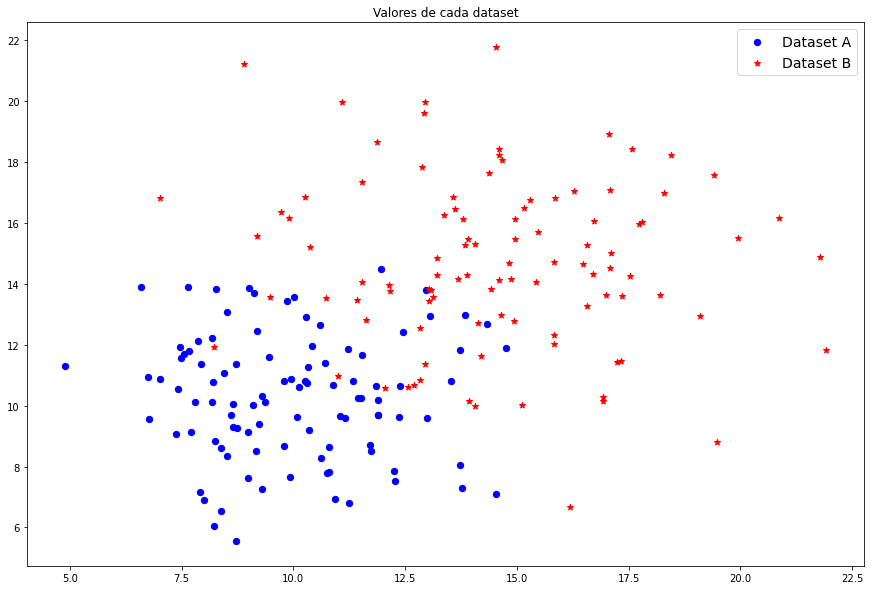

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(a_df['X'], a_df['Y'], s=40, c='blue', label='Dataset A')
plt.scatter(b_df['X'], b_df['Y'], s=40, c='red', marker='*', label='Dataset B')
plt.title("Valores de cada dataset")
plt.legend(fontsize=14)
plt.show()

## 3. Clasificador K-NN (N=100)

In [52]:
#Separamos los datos de cada dataset en datos de prueba y validación
p_train = 0.5 #Porcentaje de datos de cada dataset utilizado para entrenamiento, el resto será para validación
a_train, a_test = train_test_split(a_df, train_size = p_train)
b_train, b_test = train_test_split(b_df, train_size = p_train)

print("Ejemplos usados para entrenar (Dataset A): ", len(a_train))
print("Ejemplos usados para test (Dataset A): ", len(a_test))
print("Ejemplos usados para entrenar (Dataset B): ", len(b_train))
print("Ejemplos usados para test (Dataset B): ", len(b_test))

Ejemplos usados para entrenar (Dataset A):  50
Ejemplos usados para test (Dataset A):  50
Ejemplos usados para entrenar (Dataset B):  50
Ejemplos usados para test (Dataset B):  50


In [53]:
train_dataset = merge_dataset(a_train, b_train)
X_train = train_dataset.iloc[:,:2]
y_train = train_dataset.iloc[:,2]

test_dataset = merge_dataset(a_test, b_test)
X_test = test_dataset.iloc[:,:2]
y_test = test_dataset.iloc[:,2]

### 3.1. Selección de k = 10

In [54]:
k = 10 #nº de vecinos mas cercanos
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print(f"Modelo entrenado - Accuracy: {knn.score(X_test, y_test)}")

Modelo entrenado - Accuracy: 0.88


### 3.2. Evaluación de resultados

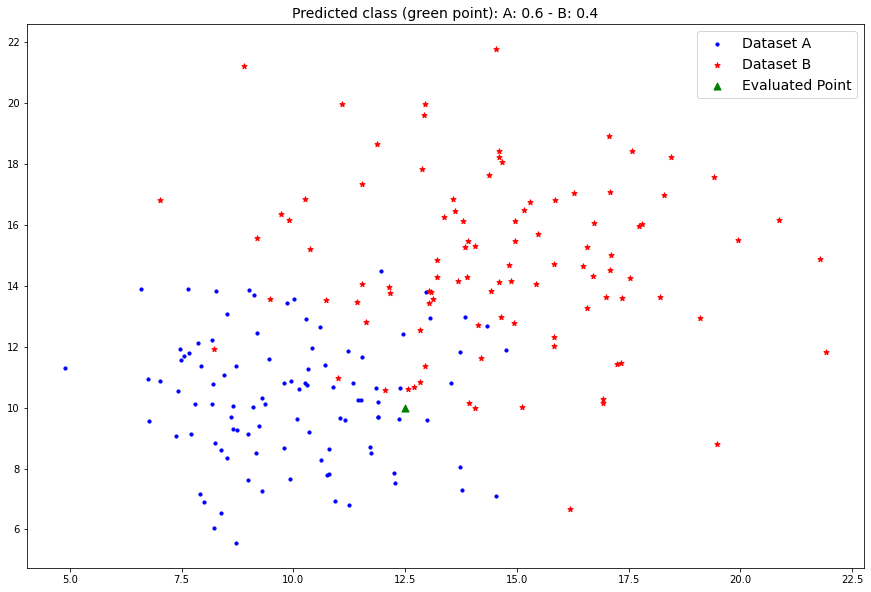

In [55]:
evaluated_point = [12.5, 10]
prediction = knn.predict_proba([evaluated_point])

plt.figure(figsize=(15,10))
plt.scatter(a_df['X'], a_df['Y'], s=40, c='blue', marker='.', label='Dataset A')
plt.scatter(b_df['X'], b_df['Y'], s=30, c='red', marker='*', label='Dataset B')
plt.scatter(evaluated_point[0], evaluated_point[1], s=50, c='green', marker='^', label='Evaluated Point')
plt.title(f"Predicted class (green point): A: {prediction[0][0]} - B: {prediction[0][1]}", fontsize=14)
plt.legend(fontsize=14)
plt.show()

Conclusión: Se observa como, con k = 10, se tiene una presición del 60% de que el punto pertenece al dataset A (lo cual es correcto).

### 3.3. Precisión vs k en el set de prueba


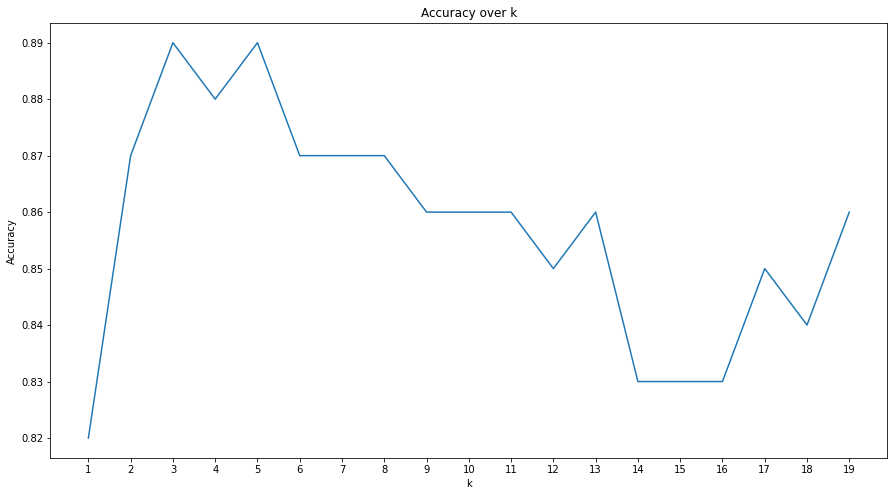

In [ ]:
scores = []
x_range = []
for k in range(1,20):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  x_range.append(k)

plt.figure(figsize=(15,8))
plt.plot(x_range,scores)
plt.xticks(x_range)
plt.title("Accuracy over k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


Conclusiones: Se observa como al aumentar el valor de k la presición comienza a disminuir. Esto ocurre ya que al tomar valores de k mayores comienzan a aparecer en la vecindad del punto de prueba, otros puntos pertenecientes a ambas clases.

### 3.4. Métricas de medición

In [56]:
y_predicted = knn.predict(X_test)
print(y_predicted)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'B'
 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'A' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']


In [57]:
print("Metricas de medición:")
print(f"{metrics.classification_report(y_test, y_predicted)}")

Metricas de medición:
              precision    recall  f1-score   support

           A       0.85      0.92      0.88        50
           B       0.91      0.84      0.87        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



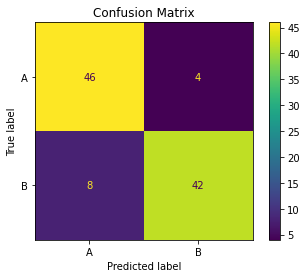

In [58]:
confusion_matrix = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

Conclusión: Se observa como el número de Falsos Positivos y Falsos Negativos es muy pequeño con respecto a los Verdaderos Positivos y Negativos, lo que nos muestra un correcto desempeño para nuestro clasificador.

## 4. Clasificador K-NN (N=150)

In [3]:
#Separamos los datos de cada dataset en datos de prueba y validación
p_train = 0.75 #Porcentaje de datos de cada dataset utilizado para entrenamiento, el resto será para validación
a_train, a_test = train_test_split(a_df, train_size = p_train)
b_train, b_test = train_test_split(b_df, train_size = p_train)

print("Ejemplos usados para entrenar (Dataset A): ", len(a_train))
print("Ejemplos usados para test (Dataset A): ", len(a_test))
print("Ejemplos usados para entrenar (Dataset B): ", len(b_train))
print("Ejemplos usados para test (Dataset B): ", len(b_test))

Ejemplos usados para entrenar (Dataset A):  75
Ejemplos usados para test (Dataset A):  25
Ejemplos usados para entrenar (Dataset B):  75
Ejemplos usados para test (Dataset B):  25


In [4]:
train_dataset = merge_dataset(a_train, b_train)
X_train = train_dataset.iloc[:,:2]
y_train = train_dataset.iloc[:,2]

test_dataset = merge_dataset(a_test, b_test)
X_test = test_dataset.iloc[:,:2]
y_test = test_dataset.iloc[:,2]

### 3.1. Selección de k = 1

In [47]:
k = 1 #nº de vecinos mas cercanos
knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
knn1.fit(X_train, y_train)
print("Modelo entrenado")

Modelo entrenado


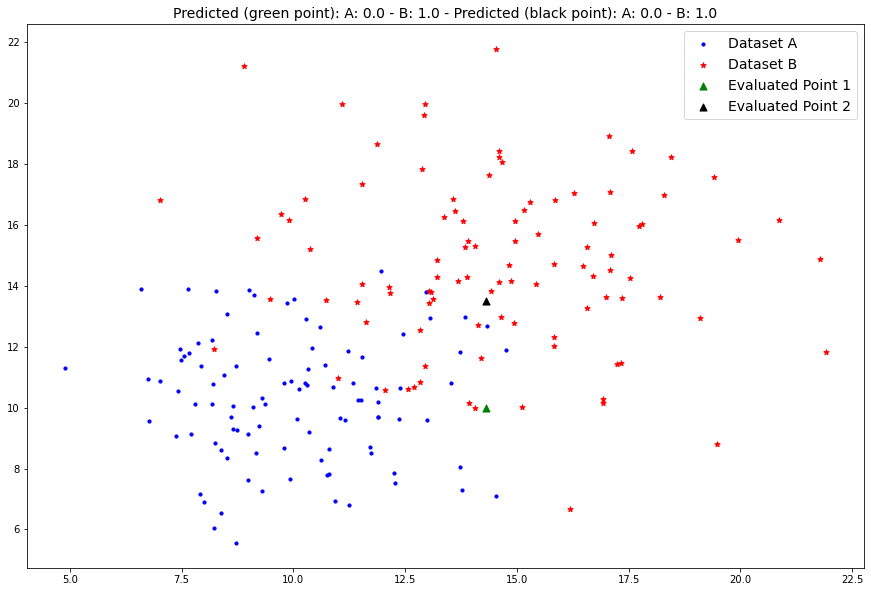

In [48]:
evaluated_points = [[14.3, 10],[14.3, 13.5]]

prediction1 = knn1.predict_proba([evaluated_points[0]])
prediction2 = knn1.predict_proba([evaluated_points[1]])

plt.figure(figsize=(15,10))
plt.scatter(a_df['X'], a_df['Y'], s=40, c='blue', marker='.', label='Dataset A')
plt.scatter(b_df['X'], b_df['Y'], s=30, c='red', marker='*', label='Dataset B')
plt.scatter(evaluated_points[0][0], evaluated_points[0][1], s=50, c='green', marker='^', label='Evaluated Point 1')
plt.scatter(evaluated_points[1][0], evaluated_points[1][1], s=50, c='black', marker='^', label='Evaluated Point 2')
plt.title(f"Predicted (green point): A: {prediction1[0][0]} - B: {prediction1[0][1]} - Predicted (black point): A: {prediction2[0][0]} - B: {prediction2[0][1]}", fontsize=14)
plt.legend(fontsize=14)
plt.show()

### 3.2. Selección de k = 5

In [49]:
k = 5 #nº de vecinos mas cercanos
knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
knn1.fit(X_train, y_train)
print("Modelo entrenado")

Modelo entrenado


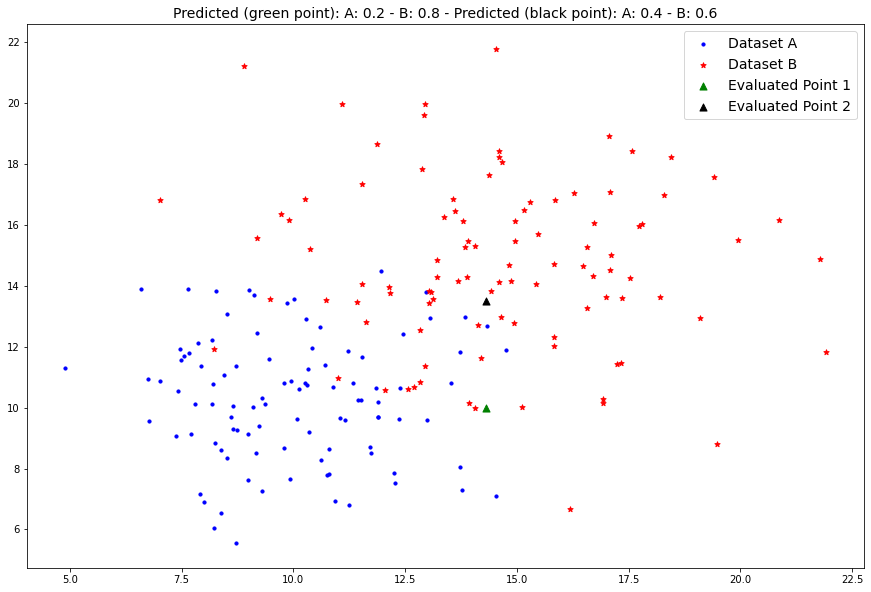

In [50]:
evaluated_points = [[14.3, 10],[14.3, 13.5]]

prediction1 = knn1.predict_proba([evaluated_points[0]])
prediction2 = knn1.predict_proba([evaluated_points[1]])

plt.figure(figsize=(15,10))
plt.scatter(a_df['X'], a_df['Y'], s=40, c='blue', marker='.', label='Dataset A')
plt.scatter(b_df['X'], b_df['Y'], s=30, c='red', marker='*', label='Dataset B')
plt.scatter(evaluated_points[0][0], evaluated_points[0][1], s=50, c='green', marker='^', label='Evaluated Point 1')
plt.scatter(evaluated_points[1][0], evaluated_points[1][1], s=50, c='black', marker='^', label='Evaluated Point 2')
plt.title(f"Predicted (green point): A: {prediction1[0][0]} - B: {prediction1[0][1]} - Predicted (black point): A: {prediction2[0][0]} - B: {prediction2[0][1]}", fontsize=14)
plt.legend(fontsize=14)
plt.show()

Conclusiones: Se observa como al disminuir el valor de k a 1, la predicción arroja un 100% de presición con la clase correcta (A o B). Mientras que al aumentar el valor de k, esta precisión disminuye dado que se encuentra con ambos puntos (de A y B) al calcular las distancias a los vecinos más cercanos.